In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
data = pd.read_csv("./data/Titanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [6]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [7]:
data = data.drop('Cabin', axis=1)

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# EDA 탐색적 데이터 분석
* 데이터의 특성, 분포, 변환
* 수치형 데이터(숫자), 범주형 데이터를 따로 분석
* 그룹연산, 데이터 시각화

# 범주형

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [11]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [12]:
categorical_cols = data[['Name', 'Sex', 'Ticket', 'Embarked']]
numerical_cols = data[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']]

# 수치형 데이터 살펴보기

In [13]:
numerical_cols.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Axes(0.125,0.11;0.775x0.77)


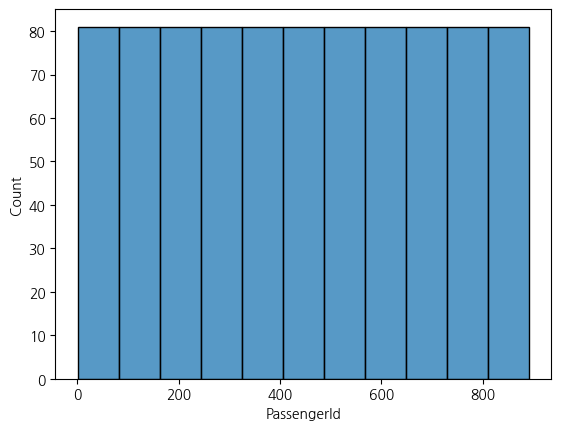

Axes(0.125,0.11;0.775x0.77)


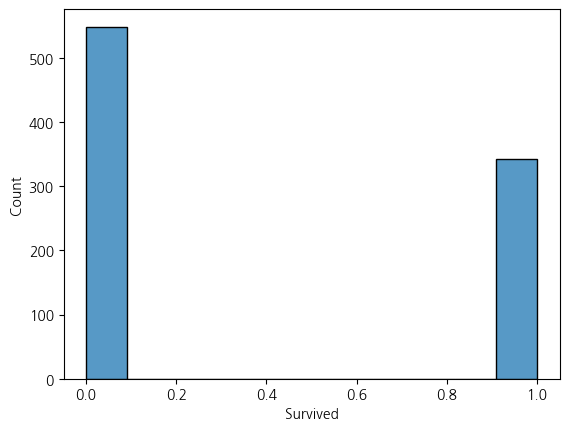

Axes(0.125,0.11;0.775x0.77)


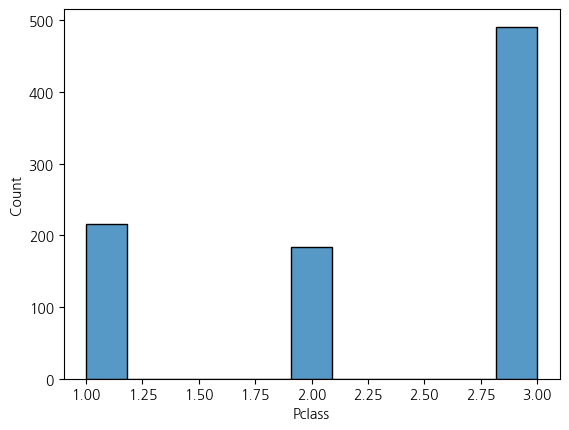

Axes(0.125,0.11;0.775x0.77)


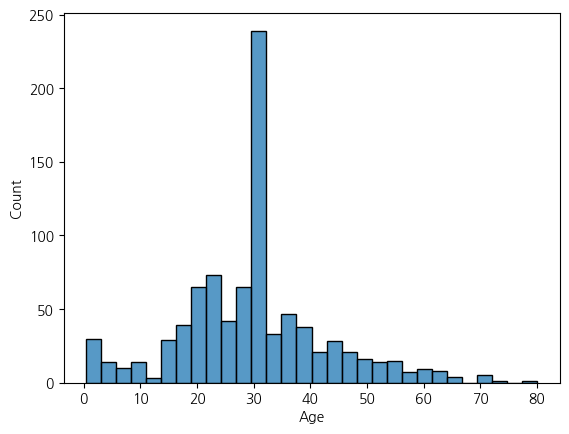

Axes(0.125,0.11;0.775x0.77)


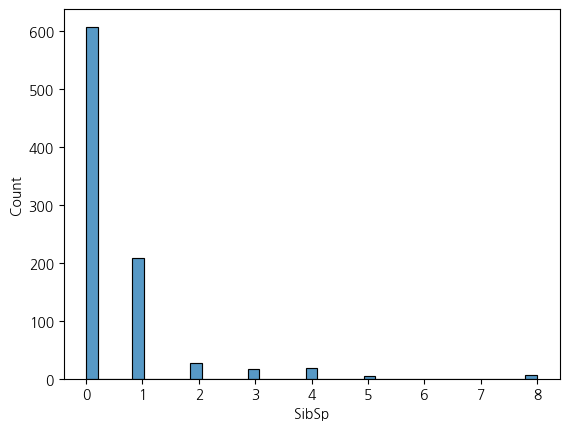

Axes(0.125,0.11;0.775x0.77)


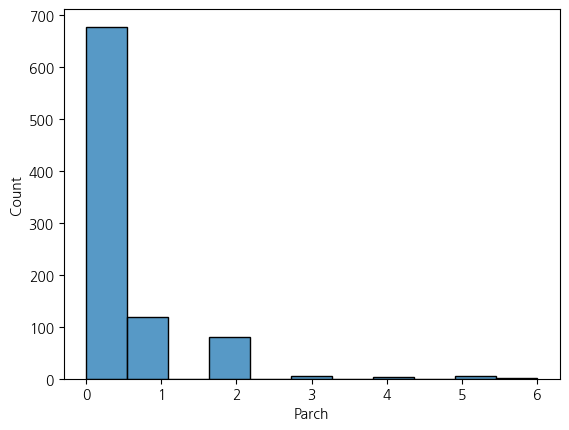

Axes(0.125,0.11;0.775x0.77)


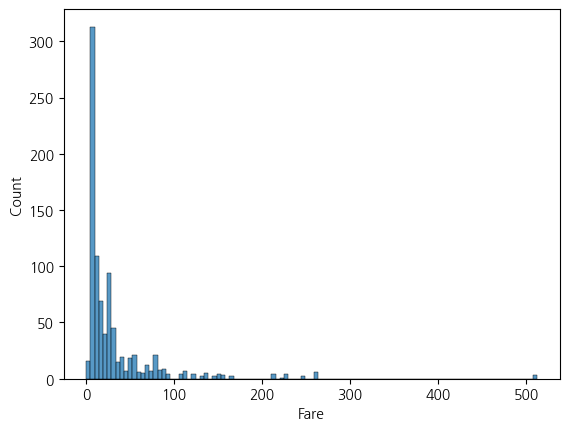

In [14]:
for col in numerical_cols:
    plt.figure
    print(sns.histplot(data[col]))
    plt.show()

# 이상값 탐지 boxplot

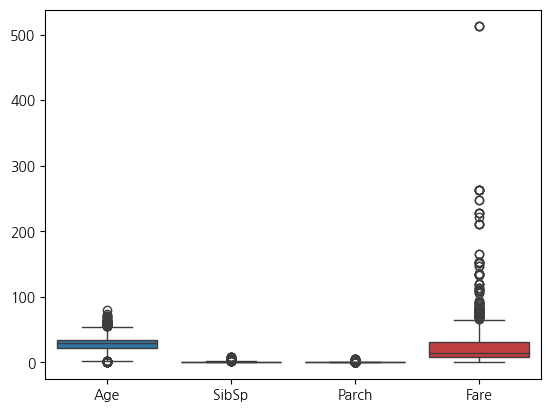

In [15]:
plt.figure()
sns.boxplot(numerical_cols.drop(['PassengerId', 'Survived', 'Pclass'], axis=1))
plt.show()

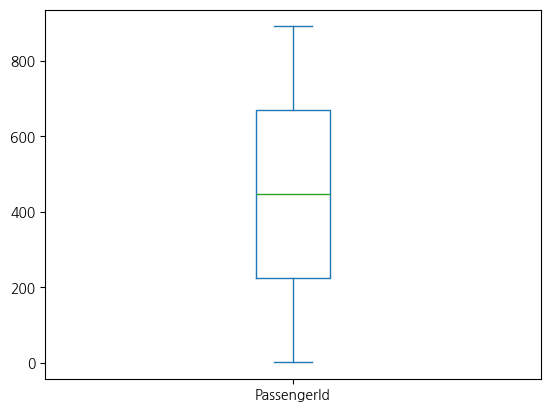

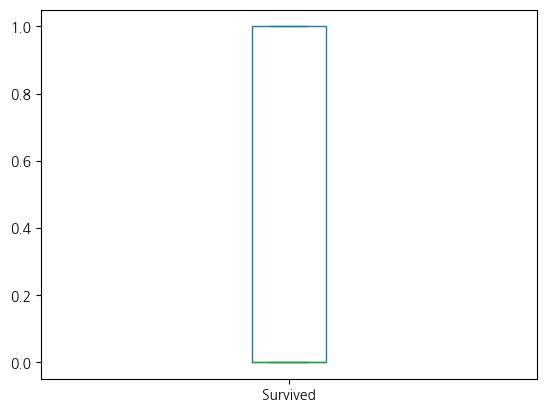

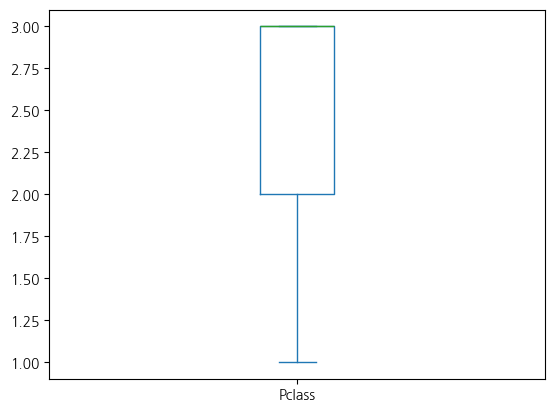

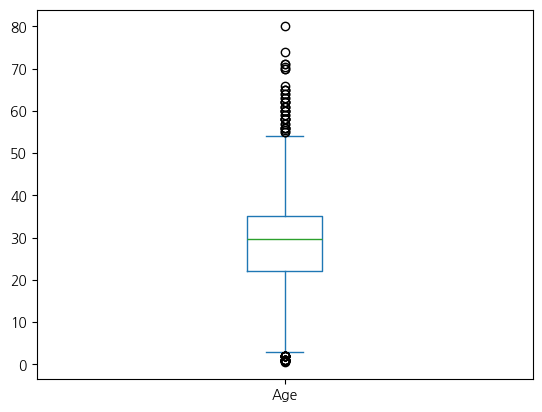

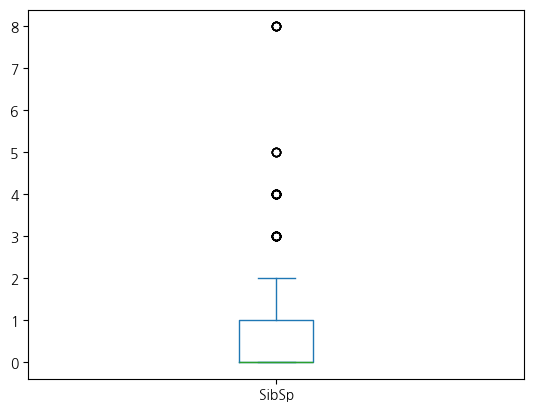

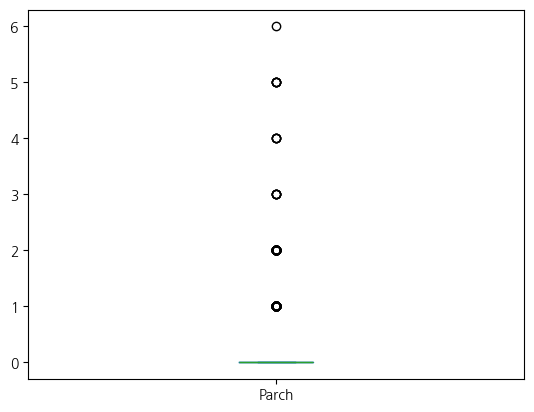

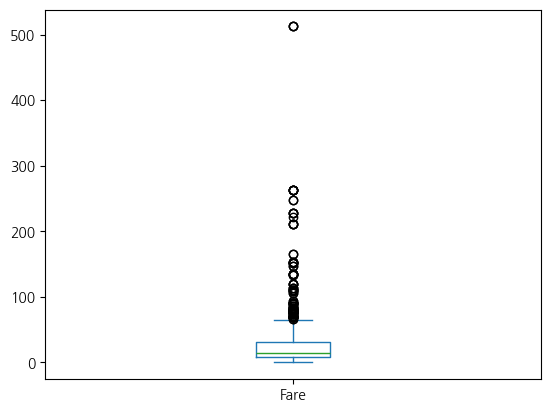

In [16]:
for cols in numerical_cols:
    numerical_cols[cols].describe()
    numerical_cols[cols].plot(kind='box')
    plt.show()

In [17]:
fare_desc  = numerical_cols['Fare'].describe()
fare_desc 

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [18]:
upper_bound = fare_desc['75%'] + (1.5 * fare_desc['75%'] - fare_desc['25%'])
upper_bound

np.float64(69.58959999999999)

In [19]:
categorical_cols.describe(include='all')

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Dooley, Mr. Patrick",male,347082,S
freq,1,577,7,646


In [20]:
categorical_cols[categorical_cols['Ticket'] == '347082']

,Name,Sex,Ticket,Embarked
13,"Andersson, Mr. Anders Johan",male,347082,S
119,"Andersson, Miss. Ellis Anna Maria",female,347082,S
541,"Andersson, Miss. Ingeborg Constanzia",female,347082,S
542,"Andersson, Miss. Sigrid Elisabeth",female,347082,S
610,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,347082,S
813,"Andersson, Miss. Ebba Iris Alfrida",female,347082,S
850,"Andersson, Master. Sigvard Harald Elias",male,347082,S


In [21]:
data[data['Ticket'] == '347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,S


In [22]:
31.275 / 7

4.4678571428571425

==================== Name ====================
Name의 유일값 891

==================== Sex ====================
Sex의 유일값 ['male' 'female']
Sex
male      577
female    314
Name: count, dtype: int64



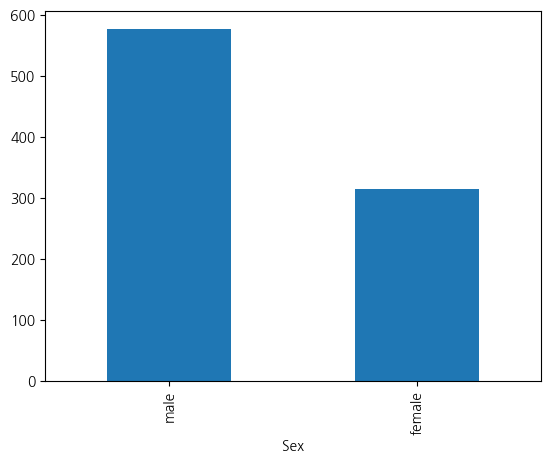

==================== Ticket ====================
Ticket의 유일값 681

==================== Embarked ====================
Embarked의 유일값 ['S' 'C' 'Q']
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64



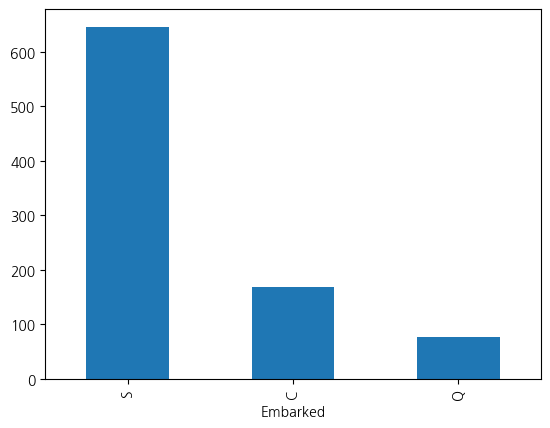

In [23]:
for col in categorical_cols:
    print("=" * 20, col, "=" * 20)
    if categorical_cols[col].nunique() < 20:        
        print(f"{col}의 유일값 {categorical_cols[col].unique()}")
        print(categorical_cols[col].value_counts())
        print()
        categorical_cols[col].value_counts().plot(kind='bar')
        plt.show()
    else: 
        print(f"{col}의 유일값 {categorical_cols[col].nunique()}")
        print()

# 상관관계 corr
* corr은 변수들 간의 상관관계를 계산해주는 함수
* 수치형 데이터만 있는 경우(피어슨)
* 범주형 데이터만 포함되어 있는 경우(스피어만)

In [24]:
# 데이터에 문자가 있으면 안됨
data.corr()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [25]:
numerical_cols.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<Axes: >

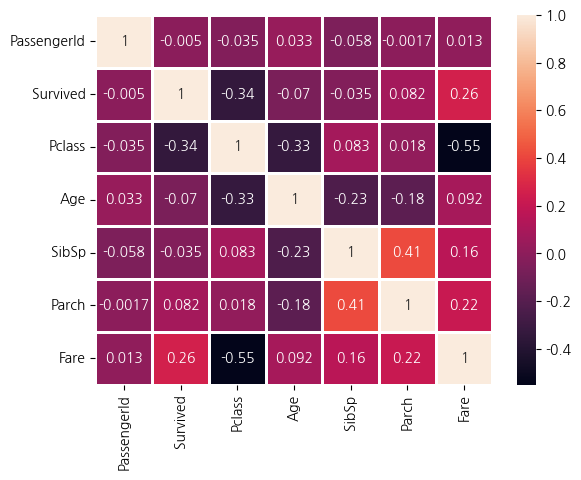

In [26]:
plt.figure()
sns.heatmap(numerical_cols.corr(), annot=True, linewidths=1)

# 종속변수(survived)와 독립변수(survived를 제외한 나머지)의 관계 파악하기 group by
* 종속변수: target변수, 최종적으로 알고 싶은 답, 분석의 목적이 되는 컬럼
* 독립변수: 종속변수를 설명하는 나머지 변수들
  * 독립변수들 간에서 서로 독립적어야 하고, 독립변수 간에 영향을 미치면 안된다.
  * 상관분석을 하는 이유는 변수들 간의 관계가 독립적인지를 판별

In [27]:
# sibsp + parch = family 변수 만들기
data['family'] = data['SibSp'] + data['Parch']
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0


In [28]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'family'],
      dtype='object')

In [29]:
data = data.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare'], axis=1)
data

,Survived,Pclass,Sex,Age,Embarked,family
0,0,3,male,22.000000,S,1
1,1,1,female,38.000000,C,1
2,1,3,female,26.000000,S,0
3,1,1,female,35.000000,S,1
4,0,3,male,35.000000,S,0
...,...,...,...,...,...,...
886,0,2,male,27.000000,S,0
887,1,1,female,19.000000,S,0
888,0,3,female,29.699118,S,3
889,1,1,male,26.000000,C,0


* pclass와 survived과의 관계
* pclass가 1등급이면 생존률이 높다.

In [30]:
data[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


* sex와 survived과의 관계
* 성별이 여성일수록 생존률이 높다.

In [31]:
data[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


* age와 survived과의 관계
* age 컬럼은 나이이므로 연령대별로 그룹화
  * 10세 미만, 10-19, 20-29, 30-39 ...

In [32]:
data[['Age', 'Survived']].groupby('Age').mean()

,Survived
Age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0


In [33]:
def age_to_cate(age):
    if 0 <= age <10:
        return "under 10s"
    elif 10 <= age < 20:
        return "10s"
    elif 20 <= age < 30:
        return "20s"
    elif 30 <= age < 40:
        return "30s"
    elif 40 <= age < 50:
        return "40s"
    elif 50 <= age < 60:
        return "50s"
    elif 60 <= age < 70:
        return "60s"
    elif 70 <= age < 80:
        return "70s"
    elif 80 <= age < 90:
        return "80s"

In [34]:
data['Age2'] = data['Age'].apply(age_to_cate)

In [35]:
data

,Survived,Pclass,Sex,Age,Embarked,family,Age2
0,0,3,male,22.000000,S,1,20s
1,1,1,female,38.000000,C,1,30s
2,1,3,female,26.000000,S,0,20s
3,1,1,female,35.000000,S,1,30s
4,0,3,male,35.000000,S,0,30s
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,S,0,20s
887,1,1,female,19.000000,S,0,10s
888,0,3,female,29.699118,S,3,20s
889,1,1,male,26.000000,C,0,20s


In [37]:
data[['Age2', 'Survived']].groupby('Age2').mean()

,Survived
Age2,
10s,0.401961
20s,0.324937
30s,0.437126
40s,0.382022
50s,0.416667
60s,0.315789
70s,0.000000
80s,1.000000
under 10s,0.612903


In [38]:
data['Age2']

0      20s
1      30s
2      20s
3      30s
4      30s
      ... 
886    20s
887    10s
888    20s
889    20s
890    30s
Name: Age2, Length: 891, dtype: object

* 데이터의 구간화를 쉽게 해주는 함수 cut
* pd.cut(data['Age'], bins=[구간], labels=[구간의 이름])

In [39]:
data['Age3']= pd.cut(data['Age'], 
       bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
       labels=['under10s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s']
      )

In [40]:
data

,Survived,Pclass,Sex,Age,Embarked,family,Age2,Age3
0,0,3,male,22.000000,S,1,20s,20s
1,1,1,female,38.000000,C,1,30s,30s
2,1,3,female,26.000000,S,0,20s,20s
3,1,1,female,35.000000,S,1,30s,30s
4,0,3,male,35.000000,S,0,30s,30s
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,S,0,20s,20s
887,1,1,female,19.000000,S,0,10s,10s
888,0,3,female,29.699118,S,3,20s,20s
889,1,1,male,26.000000,C,0,20s,20s


In [41]:
for col in ['Embarked', 'family']:
    print("=" * 20, col, "=" * 20)
    display(data[[col, 'Survived']].groupby(col).mean().sort_values(by='Survived', ascending=False))
    print()

==================== Embarked ====================


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009



==================== family ====================


,Survived
family,
3,0.724138
2,0.578431
1,0.552795
6,0.333333
0,0.303538
4,0.200000
5,0.136364
7,0.000000
10,0.000000


* pclass 별, sex 별, 생존율

In [42]:
data[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex']).mean().sort_values(by='Survived', ascending=False)

,,Survived
Pclass,Sex,
1,female,0.968085
2,female,0.921053
3,female,0.500000
1,male,0.368852
2,male,0.157407
3,male,0.135447


* pclass 별, sex 별, age별 생존율

In [43]:
data[['Pclass', 'Sex', 'Age3', 'Survived']].groupby(['Pclass', 'Sex', 'Age3']).mean().sort_values(by='Survived', ascending=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3028\655354082.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data[['Pclass', 'Sex', 'Age3', 'Survived']].groupby(['Pclass', 'Sex', 'Age3']).mean().sort_values(by='Survived', ascending=False)


Survived
Pclass Sex    Age3              
1      female 10s       1.000000
              30s       1.000000
       male   under10s  1.000000
       female 50s       1.000000
              60s       1.000000
2      female 10s       1.000000
3      female 60s       1.000000
2      male   under10s  1.000000
       female under10s  1.000000
1      female 20s       0.966667
2      female 30s       0.941176
1      female 40s       0.923077
2      female 40s       0.900000
              20s       0.900000
              50s       0.666667
3      female 20s       0.554054
1      male   30s       0.520000
3      female 10s       0.520000
              under10s  0.500000
              30s       0.428571
1      male   10s       0.400000
              40s       0.375000
3      male   under10s  0.363636
1      male   20s       0.350000
2      male   60s       0.333333
1      male   70s       0.333333
              50s       0.285714
3      male   30s       0.142857
              10s       0.129630
              20s       0.120419
2      male   30s       0.115385
              40s       0.111111
              10s       0.100000
3      male   40s       0.090909
2      male   20s       0.047619
1      female under10s  0.000000
       male   60s       0.000000
2      male   50s       0.000000
3      female 40s       0.000000
       male   50s       0.000000
              60s       0.000000
              70s       0.000000
1      female 70s            NaN
              80s            NaN
       male   80s            NaN
2      female 60s            NaN
              70s            NaN
              80s            NaN
       male   70s            NaN
              80s            NaN
3      female 50s            NaN
              70s            NaN
              80s            NaN
       male   80s            NaN

In [44]:
data[['Pclass', 'Sex', 'Embarked', 'Survived']].groupby(['Pclass', 'Sex', 'Embarked']).mean().sort_values(by='Survived', ascending=False)

Survived
Pclass Sex    Embarked          
1      female Q         1.000000
2      female Q         1.000000
              C         1.000000
1      female C         0.976744
              S         0.960000
2      female S         0.910448
3      female Q         0.727273
              C         0.652174
1      male   C         0.404762
3      female S         0.375000
1      male   S         0.354430
3      male   C         0.232558
2      male   C         0.200000
              S         0.154639
3      male   S         0.128302
              Q         0.076923
1      male   Q         0.000000
2      male   Q         0.000000

In [45]:
data[['Pclass', 'Sex', 'family', 'Survived']].groupby(['Pclass', 'Sex', 'family']).mean().sort_values(by='Survived', ascending=False)

Survived
Pclass Sex    family          
1      female 1       1.000000
              2       1.000000
              4       1.000000
              5       1.000000
2      female 5       1.000000
              3       1.000000
1      male   3       1.000000
2      female 4       1.000000
1      female 0       0.970588
2      female 2       0.928571
              0       0.906250
              1       0.894737
3      female 3       0.833333
              0       0.616667
              2       0.545455
              1       0.517241
1      female 3       0.500000
2      male   2       0.470588
1      male   2       0.454545
              1       0.387097
3      female 6       0.375000
1      male   0       0.333333
3      male   3       0.333333
              2       0.320000
              6       0.250000
2      male   3       0.250000
3      male   1       0.178571
              0       0.121212
2      male   0       0.097222
              1       0.066667
1      male   5       0.000000
3      female 10      0.000000
              7       0.000000
              4       0.000000
              5       0.000000
       male   4       0.000000
              5       0.000000
              7       0.000000
              10      0.000000

# 최종 변수 선택

In [47]:
data

,Survived,Pclass,Sex,Age,Embarked,family,Age2,Age3
0,0,3,male,22.000000,S,1,20s,20s
1,1,1,female,38.000000,C,1,30s,30s
2,1,3,female,26.000000,S,0,20s,20s
3,1,1,female,35.000000,S,1,30s,30s
4,0,3,male,35.000000,S,0,30s,30s
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,S,0,20s,20s
887,1,1,female,19.000000,S,0,10s,10s
888,0,3,female,29.699118,S,3,20s,20s
889,1,1,male,26.000000,C,0,20s,20s


In [56]:
X = data.drop(['Survived', 'Age', 'Age3'], axis=1)
y = data['Survived']

In [57]:
# 종속변수
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# 데이터 전처리 없이 분석을 할 경우

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

* 종속변수와 독립변수를 나눠서 훈련데이터와 테스트데이터로 나누기

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 머신러닝, 딥러닝 알고리즘에 데이터를 넣어서 학습시킬때는 반드시 모든 문자를 숫자로 변환해서 넣아야 함

# 문자로 된 컬럼 one-hot encoding 하기
* get_dummies

In [74]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [75]:
X_train

,Pclass,family,Sex_male,Embarked_Q,Embarked_S,Age2_20s,Age2_30s,Age2_40s,Age2_50s,Age2_60s,Age2_70s,Age2_80s,Age2_under 10s
748,1,1,True,False,True,False,False,False,False,False,False,False,False
45,3,0,True,False,True,True,False,False,False,False,False,False,False
28,3,0,False,True,False,True,False,False,False,False,False,False,False
633,1,0,True,False,True,True,False,False,False,False,False,False,False
403,3,1,True,False,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,2,1,True,False,True,False,True,False,False,False,False,False,False
190,2,0,False,False,True,False,True,False,False,False,False,False,False
736,3,4,False,False,True,False,False,True,False,False,False,False,False
462,1,0,True,False,True,False,False,True,False,False,False,False,False


In [76]:
X_test

,Pclass,family,Sex_male,Embarked_Q,Embarked_S,Age2_20s,Age2_30s,Age2_40s,Age2_50s,Age2_60s,Age2_70s,Age2_under 10s
625,1,0,True,False,True,False,False,False,False,True,False,False
566,3,0,True,False,True,False,False,False,False,False,False,False
459,3,0,True,True,False,True,False,False,False,False,False,False
804,3,0,True,False,True,True,False,False,False,False,False,False
338,3,0,True,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
184,3,2,False,False,True,False,False,False,False,False,False,True
607,1,0,True,False,True,True,False,False,False,False,False,False
624,3,0,True,False,True,True,False,False,False,False,False,False
103,3,0,True,False,True,False,True,False,False,False,False,False


In [77]:
X_train.columns

Index(['Pclass', 'family', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Age2_20s',
       'Age2_30s', 'Age2_40s', 'Age2_50s', 'Age2_60s', 'Age2_70s', 'Age2_80s',
       'Age2_under 10s'],
      dtype='object')

In [78]:
X_test.columns

Index(['Pclass', 'family', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Age2_20s',
       'Age2_30s', 'Age2_40s', 'Age2_50s', 'Age2_60s', 'Age2_70s',
       'Age2_under 10s'],
      dtype='object')

In [70]:
len(X_test.columns)

12

In [79]:
X_test.insert(11, 'Age2_80s', False)

In [80]:
X_test.columns

Index(['Pclass', 'family', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Age2_20s',
       'Age2_30s', 'Age2_40s', 'Age2_50s', 'Age2_60s', 'Age2_70s', 'Age2_80s',
       'Age2_under 10s'],
      dtype='object')

In [81]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       165
           1       0.73      0.60      0.66       103

    accuracy                           0.76       268
   macro avg       0.75      0.73      0.74       268
weighted avg       0.76      0.76      0.76       268

